[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiptos/is_notes/blob/main/nn_diabetes.ipynb)

# Prediction of Diabetes using ANN

The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict whether a patient has diabetes based on diagnostic measurements. The dataset structure is the following:

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)

In [2]:
#importing Libraries
import seaborn as sns
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Exploratory Data Analysis

Load the `diabetes.csv`dataset, that can be found in the `datasets` directory.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check for null values:

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Show a graph with the count of examples that are `negative` and that are `positive`. You can use the [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) of the `Seaborn` module. You can use pandas' [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) function.

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


<Axes: xlabel='Outcome', ylabel='Age'>

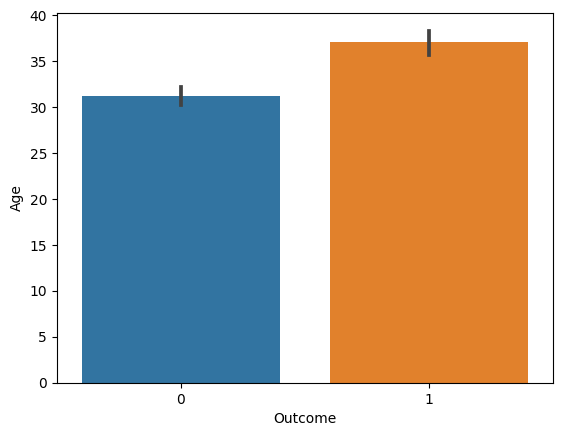

In [5]:
def labels(n):
  if(n == 1):
    return "positive"
  return "negative"

df2 = df.copy()
df2.Outcome.apply(labels)
print(df2.Outcome)
# cases_data = map(labels, df.Outcome)
# print(list(cases_data))
sns.barplot(data=df2, x="Outcome", y="Age" )

Draw a graph showing the distribution of glucose levels. You can use the [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot).

Do the same for the Body Mass Index (BMI) and Blood Pressure.

Draw a graph with the correlation between features ([`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)).

## Training the model

Reload the dataset:

In [ ]:
X,y = load_diabetes(return_X_y=True, as_frame=True)

Split the dataset in two datasets: (X_train,y_train), with 80% of the examples and (X_test,y_test) with the remaining 20%. You can use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

To be able to use PyTorch, it is necessary to create the [`tensor`](https://pytorch.org/docs/stable/tensors.html).

In [ ]:
# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

### ANN class

Create the model using two linear hidden layers and one linear output layer. Also use ReLU activation function.

In [ ]:
# Creating the Model
# -- Complete the code
class ANN_model(nn.Module):


Instantiate the class.

In [ ]:
torch.manual_seed(20)
model = ANN_model()

Confirm the architecture by printing the parameters:

In [ ]:
model.parameters

Use [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss) as the loss function and the [`Adam`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html?highlight=adam#torch.optim.Adam) optimizer with  $lr=0.01$.

In [ ]:
# Backward Propergation - loss and optimizer
loss_function = ...
optimizer = ...

Train for 500 epocs.

In [ ]:
epochs=500
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Plot the `final_losses` array to display the cost along the training.

In [ ]:
#plot the loss function


Make the predictions on the `X_test` feature set and store the result in `predictions`.

In [ ]:
# Calculate the predictions
predictions = []


### Model evaluation

Display the confusion matrix using [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and Seaborn's [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
# Confusion matrix

Finally, display the accuracy score ([`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)).

In [ ]:
#Accuracy
